<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 DataFrame -> csv 파일 변환

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/Pytorch\ NLP/BERT/data_in/NER

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/NER


In [ ]:
import urllib.request

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/naver/nlp-challenge/master/missions/ner/data/train/train_data',filename='dataset.txt')

('dataset.txt', <http.client.HTTPMessage at 0x7f1f4014e7d0>)

In [ ]:
from tqdm import tqdm

In [ ]:
train_text=[]
train_BIO=[]

text=[]
BIO=[]

with open('dataset.txt','r') as data:
  for line in tqdm(data.readlines()):
    line=line.split('\t') # [index,text,BIO]
    if line[0]=='\n':
      text=' '.join(text)
      BIO=' '.join(BIO)
      train_text.append(text)
      train_BIO.append(BIO)
      text=[]
      BIO=[]
      continue
    text.append(line[1])
    BIO.append(line[2].strip('\n'))


100%|██████████| 1153571/1153571 [00:00<00:00, 1323416.37it/s]


In [ ]:
train_text[1]

'이 음경동맥의 직경이 8 19mm입니다 .'

In [ ]:
train_BIO[1]

'- - - NUM_B NUM_B -'

In [ ]:
import pandas as pd

In [ ]:
train_df=pd.DataFrame({'text':train_text,'BIO':train_BIO})
train_df

,text,BIO
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",PER_B DAT_B - ORG_B CVL_B - - - - -
1,이 음경동맥의 직경이 8 19mm입니다 .,- - - NUM_B NUM_B -
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,NUM_B - NUM_B ORG_B PER_B - NUM_B - - NUM_B - ...
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,NUM_B NUM_B LOC_B - EVT_B - - - - -
4,▲ 퍼거슨 씨족의 꾀,- PER_B CVL_B -
...,...,...
89995,이륙한 지 3일 뒷면 우주선은 달 근처의 차도에 진입하게 됩니다 .,- - DAT_B - - - - - - - -
89996,(이석무 감리비 smlee@mydaily.co.kr)[관련기사]▶ ▶ ▶ ▶ ▶ 기...,PER_B CVL_B TRM_B - - - - - - - - TRM_B ORG_B ...
89997,그는 레노버가 지난 1월 IBM PC 현대엘리베이터를 승자하며 영입한 김대은 최준우...,- ORG_B DAT_B DAT_I ORG_B ORG_B ORG_I - - PER_...
89998,미움도 열심성이고 일도 열심성이고 .,- - - - -


In [ ]:
train_df['BIO']=train_df['BIO'].str.replace('-','O')
train_df

,text,BIO
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",PER_B DAT_B O ORG_B CVL_B O O O O O
1,이 음경동맥의 직경이 8 19mm입니다 .,O O O NUM_B NUM_B O
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,NUM_B O NUM_B ORG_B PER_B O NUM_B O O NUM_B O ...
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,NUM_B NUM_B LOC_B O EVT_B O O O O O
4,▲ 퍼거슨 씨족의 꾀,O PER_B CVL_B O
...,...,...
89995,이륙한 지 3일 뒷면 우주선은 달 근처의 차도에 진입하게 됩니다 .,O O DAT_B O O O O O O O O
89996,(이석무 감리비 smlee@mydaily.co.kr)[관련기사]▶ ▶ ▶ ▶ ▶ 기...,PER_B CVL_B TRM_B O O O O O O O O TRM_B ORG_B ...
89997,그는 레노버가 지난 1월 IBM PC 현대엘리베이터를 승자하며 영입한 김대은 최준우...,O ORG_B DAT_B DAT_I ORG_B ORG_B ORG_I O O PER_...
89998,미움도 열심성이고 일도 열심성이고 .,O O O O O


In [ ]:
train_df.to_csv('train_df.csv',index=False)
pd.read_csv('train_df.csv')

,text,BIO
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",PER_B DAT_B O ORG_B CVL_B O O O O O
1,이 음경동맥의 직경이 8 19mm입니다 .,O O O NUM_B NUM_B O
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,NUM_B O NUM_B ORG_B PER_B O NUM_B O O NUM_B O ...
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,NUM_B NUM_B LOC_B O EVT_B O O O O O
4,▲ 퍼거슨 씨족의 꾀,O PER_B CVL_B O
...,...,...
89995,이륙한 지 3일 뒷면 우주선은 달 근처의 차도에 진입하게 됩니다 .,O O DAT_B O O O O O O O O
89996,(이석무 감리비 smlee@mydaily.co.kr)[관련기사]▶ ▶ ▶ ▶ ▶ 기...,PER_B CVL_B TRM_B O O O O O O O O TRM_B ORG_B ...
89997,그는 레노버가 지난 1월 IBM PC 현대엘리베이터를 승자하며 영입한 김대은 최준우...,O ORG_B DAT_B DAT_I ORG_B ORG_B ORG_I O O PER_...
89998,미움도 열심성이고 일도 열심성이고 .,O O O O O


# LABEL

In [ ]:
label=[]

def find_label(labels):
  for i in labels:
    if i not in label:
      label.append(i)

In [ ]:
train_df['BIO'].str.split().apply(find_label)

In [ ]:
label.sort()
label

In [ ]:
label=['UNK']+label

In [ ]:
print(label)
len(label)

['UNK', 'AFW_B', 'AFW_I', 'ANM_B', 'ANM_I', 'CVL_B', 'CVL_I', 'DAT_B', 'DAT_I', 'EVT_B', 'EVT_I', 'FLD_B', 'FLD_I', 'LOC_B', 'LOC_I', 'MAT_B', 'MAT_I', 'NUM_B', 'NUM_I', 'O', 'ORG_B', 'ORG_I', 'PER_B', 'PER_I', 'PLT_B', 'PLT_I', 'TIM_B', 'TIM_I', 'TRM_B', 'TRM_I']


30

# Transformers 라이브러리 불러오기 및 BertTokenizer 불러오기

In [ ]:
# Transformers 설치
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.9 MB/s eta 0:00:00


In [ ]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [ ]:
# Tokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [ ]:
cache_dir='.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba'

# 데이터 분석

In [ ]:
import pandas as pd

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/Pytorch\ NLP/BERT/data_in/NER

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/NER


In [ ]:
train_df=pd.read_csv('train_df.csv')
train_df

,text,BIO
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",PER_B DAT_B O ORG_B CVL_B O O O O O
1,이 음경동맥의 직경이 8 19mm입니다 .,O O O NUM_B NUM_B O
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,NUM_B O NUM_B ORG_B PER_B O NUM_B O O NUM_B O ...
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,NUM_B NUM_B LOC_B O EVT_B O O O O O
4,▲ 퍼거슨 씨족의 꾀,O PER_B CVL_B O
...,...,...
89995,이륙한 지 3일 뒷면 우주선은 달 근처의 차도에 진입하게 됩니다 .,O O DAT_B O O O O O O O O
89996,(이석무 감리비 smlee@mydaily.co.kr)[관련기사]▶ ▶ ▶ ▶ ▶ 기...,PER_B CVL_B TRM_B O O O O O O O O TRM_B ORG_B ...
89997,그는 레노버가 지난 1월 IBM PC 현대엘리베이터를 승자하며 영입한 김대은 최준우...,O ORG_B DAT_B DAT_I ORG_B ORG_B ORG_I O O PER_...
89998,미움도 열심성이고 일도 열심성이고 .,O O O O O


In [ ]:
train_len=train_df['text'].apply(lambda x : len(tokenizer.tokenize(x)))
train_len

0        26
1        15
2        44
3        31
4         8
         ..
89995    22
89996    84
89997    37
89998    14
89999    13
Name: text, Length: 90000, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

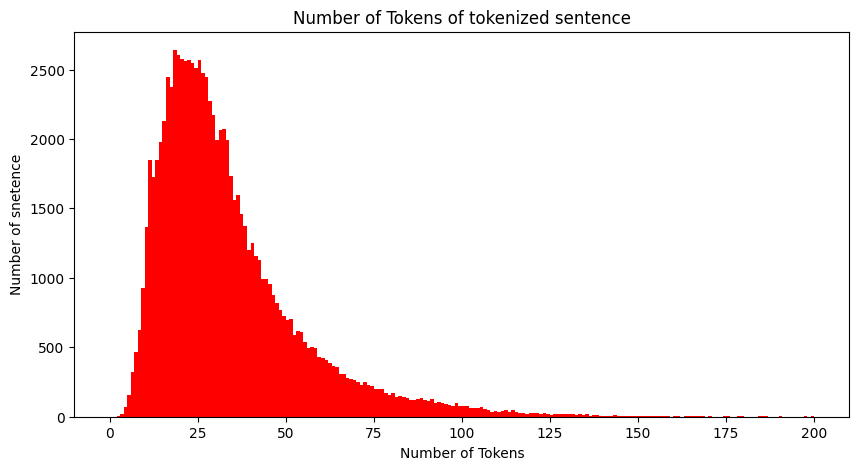

In [ ]:
plt.figure(figsize=(10,5))

plt.hist(train_len,color='r',bins=200,range=[0,200])
plt.title('Number of Tokens of tokenized sentence')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of snetence')
plt.show()

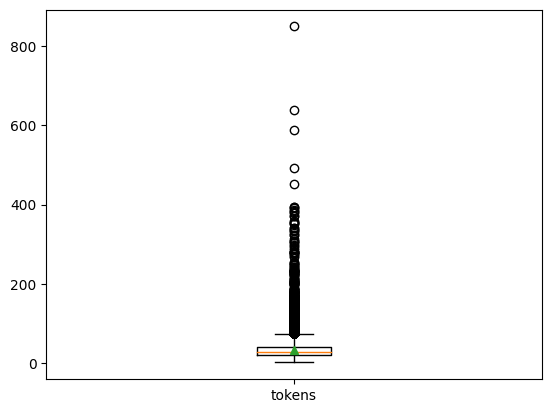

In [ ]:
plt.boxplot(train_len,labels=['tokens'],showmeans=True)
plt.show()

In [ ]:
import numpy as np

In [ ]:
print('토큰 최대 개수 : {}'.format(np.max(train_len)))
print('토큰 최소 개수 : {}'.format(np.min(train_len)))
print('토큰 개수 평균 : {:.2f}'.format(np.mean(train_len)))
print('토큰 개수 중간값 : {:.2f}'.format(np.median(train_len)))
print('토큰 개수 1사분위 : {}'.format(np.percentile(train_len,25)))
print('토큰 개수 3사분위 : {}'.format(np.percentile(train_len,75)))
print('토큰 개수 상위 99퍼 : {}'.format(np.percentile(train_len,99))) # 품질 향상으 위해 최대한 많은 token을 받자. => MAX_LEN으로 설정 : 111

토큰 최대 개수 : 850
토큰 최소 개수 : 1
토큰 개수 평균 : 33.62
토큰 개수 중간값 : 28.00
토큰 개수 1사분위 : 19.0
토큰 개수 3사분위 : 41.0
토큰 개수 상위 99퍼 : 111.0


# 전처리

[ 절차 ]
- NER taks는 단순히 최대 길이에 따른 padding만으로는 부족
- 데이터셋을 보니 공백 기준으로 해당 token이 어던 BIO에 속하는지에 대한 정보가 label로 존재한다
- 하지만, 각 token을 BertTokenizer(WordPiece)로 분해하기 때문에 공백기준으로 분리된 token이 추가적으로 더 쪼개질 수 있다.
- 그럴 경우, 만약, BIO의 B인 객체가 쪼개질 경우 -> 맨 앞만 B로 설정하고, 그 뒤는 I로 부여한다.
- I나, O인 객체가 쪼개질 경우는 그대로 I와 O를 쪼개진 token들에 부여한다.
- 이렇게 부여하고 난 이후, text는 Tokneizer Enocding을 거치면 [CLS],[SEP] Token이 붇게 되는데 이에 해당하는 자리를 만들어 준 다음
- MAX_LEN에 따른 패딩 처리 또는 Truncation을 진행한다. ( [CLS],[SEP]의 자리에 대한 label은 PAD와 동일한 label(=0)으로 처리한다

[ Huggingface Tokenizer Vocabulary의 특성 ]
- Huggingface Tokenizer의 Vocabulary는 0번이 [PAD]를 뜻하며,
그 뒤를 이어서 1번부터 1000번까지 [unused #1]~[unused #1000]가 존재한다.
- 이는 Special token을 위한 자리이며, 우리는 단순히 PAD와 동일한 역할을 하는 Token인 'UNK' Token를 0번째에 박아놓고
- 그 뒤에 1000개보다 적은 개수의 special token을 리스트로 마련한 다음에
- 해당 리스트의 index를 각 token의 index로 사용한다

In [ ]:
import pandas as pd

In [ ]:
cd drive/MyDrive/Pytorch\ NLP/BERT

/content/drive/MyDrive/Pytorch NLP/BERT


In [ ]:
train_df=pd.read_csv('data_in/NER/train_df.csv')
train_df

,text,BIO
0,"비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율",PER_B DAT_B O ORG_B CVL_B O O O O O
1,이 음경동맥의 직경이 8 19mm입니다 .,O O O NUM_B NUM_B O
2,9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 2...,NUM_B O NUM_B ORG_B PER_B O NUM_B O O NUM_B O ...
3,7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 .,NUM_B NUM_B LOC_B O EVT_B O O O O O
4,▲ 퍼거슨 씨족의 꾀,O PER_B CVL_B O
...,...,...
89995,이륙한 지 3일 뒷면 우주선은 달 근처의 차도에 진입하게 됩니다 .,O O DAT_B O O O O O O O O
89996,(이석무 감리비 smlee@mydaily.co.kr)[관련기사]▶ ▶ ▶ ▶ ▶ 기...,PER_B CVL_B TRM_B O O O O O O O O TRM_B ORG_B ...
89997,그는 레노버가 지난 1월 IBM PC 현대엘리베이터를 승자하며 영입한 김대은 최준우...,O ORG_B DAT_B DAT_I ORG_B ORG_B ORG_I O O PER_...
89998,미움도 열심성이고 일도 열심성이고 .,O O O O O


## LABEL vocabulary

In [ ]:
label=[]

def find_label(labels):
  for i in labels:
    if i not in label:
      label.append(i)

train_df['BIO'].str.split().apply(find_label)
label.sort()
label=['UNK']+label
print(label)
len(label)

['UNK', 'AFW_B', 'AFW_I', 'ANM_B', 'ANM_I', 'CVL_B', 'CVL_I', 'DAT_B', 'DAT_I', 'EVT_B', 'EVT_I', 'FLD_B', 'FLD_I', 'LOC_B', 'LOC_I', 'MAT_B', 'MAT_I', 'NUM_B', 'NUM_I', 'O', 'ORG_B', 'ORG_I', 'PER_B', 'PER_I', 'PLT_B', 'PLT_I', 'TIM_B', 'TIM_I', 'TRM_B', 'TRM_I']


30

In [ ]:
label_vocab_itos={token : index for token,index in enumerate(label)}
label_vocab_itos

{0: 'UNK',
 1: 'AFW_B',
 2: 'AFW_I',
 3: 'ANM_B',
 4: 'ANM_I',
 5: 'CVL_B',
 6: 'CVL_I',
 7: 'DAT_B',
 8: 'DAT_I',
 9: 'EVT_B',
 10: 'EVT_I',
 11: 'FLD_B',
 12: 'FLD_I',
 13: 'LOC_B',
 14: 'LOC_I',
 15: 'MAT_B',
 16: 'MAT_I',
 17: 'NUM_B',
 18: 'NUM_I',
 19: 'O',
 20: 'ORG_B',
 21: 'ORG_I',
 22: 'PER_B',
 23: 'PER_I',
 24: 'PLT_B',
 25: 'PLT_I',
 26: 'TIM_B',
 27: 'TIM_I',
 28: 'TRM_B',
 29: 'TRM_I'}

In [ ]:
label_vocab_stoi={index : token for token,index in enumerate(label)}
label_vocab_stoi

{'UNK': 0,
 'AFW_B': 1,
 'AFW_I': 2,
 'ANM_B': 3,
 'ANM_I': 4,
 'CVL_B': 5,
 'CVL_I': 6,
 'DAT_B': 7,
 'DAT_I': 8,
 'EVT_B': 9,
 'EVT_I': 10,
 'FLD_B': 11,
 'FLD_I': 12,
 'LOC_B': 13,
 'LOC_I': 14,
 'MAT_B': 15,
 'MAT_I': 16,
 'NUM_B': 17,
 'NUM_I': 18,
 'O': 19,
 'ORG_B': 20,
 'ORG_I': 21,
 'PER_B': 22,
 'PER_I': 23,
 'PLT_B': 24,
 'PLT_I': 25,
 'TIM_B': 26,
 'TIM_I': 27,
 'TRM_B': 28,
 'TRM_I': 29}

def